In [214]:
import turicreate as tc
import numpy as np

In [215]:
tc.__version__

'6.4.1'

In [216]:
from pymongo import MongoClient

In [217]:
client = MongoClient(serverSelectionTimeoutMS=50)
db = client.turidatabase

In [218]:
db.labeledinstances.find({'dsid': 5})

In [219]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=50), 'turidatabase')

In [220]:
def get_dataset_data(dsid):
    features = []
    labels = []
    
    for a in db.labeledinstances.find({"dsid": dsid}):
        features.append([float(val) for val in a['feature']])
        labels.append(a['label'])
    data = {'target': labels, 'sequence':np.array(features)}
    
    return data


def get_dataset_sframe(dsid):
    data = get_dataset_data(dsid)
    return tc.SFrame(data=data)


In [221]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 100 lines in 0.028677 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 838 lines in 0.010104 secs.

In [222]:
sframe_colors

red,green,blue,target
226.24744897959184,202.7944606413994,181.40962099125363,white
160.03279883381924,9.325801749271136,12.466107871720116,red
220.64395043731776,199.8338192419825,176.76384839650146,white
241.21137026239063,103.66180758017492,29.419460641399414,orange
71.08491253644314,151.94460641399417,60.61807580174927,green
196.34365889212827,179.62208454810497,162.02004373177843,white
195.65524781341108,181.6865889212828,166.10204081632654,white
197.48943148688048,70.49781341107871,6.662900874635568,orange
208.2084548104956,91.54227405247812,18.651967930029155,orange
160.70845481049562,22.25546647230321,20.51639941690962,red


In [223]:
 import turicreate.aggregate as agg
sframe_colors.groupby('target',operations={'count': agg.COUNT()})

target,count
green,138
orange,144
blue,136
yellow,141
red,141
blue\,1
white,137


## Graph the colors

In [228]:
x = sframe_colors['red']
y = sframe_colors['green']
scply = tc.visualization.scatter(x,y)
scply.show()

In [358]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')
df = sframe_colors.to_dataframe()

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 100 lines in 0.026877 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 927 lines in 0.010912 secs.

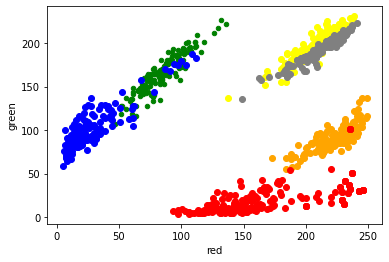

In [370]:

plt = df[df.target == 'green'].plot.scatter(x='red', y = 'green', c='Green')
plt.scatter(x = df[df.target == "yellow"]['red'], y = df[df.target == "yellow"]['green'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['red'], y = df[df.target == "white"]['green'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['red'], y = df[df.target == "orange"]['green'], c='Orange')
plt.scatter(x = df[df.target == "red"]['red'], y = df[df.target == "red"]['green'], c='Red')
plt.scatter(x = df[df.target == "blue"]['red'], y = df[df.target == "blue"]['green'], c='Blue')

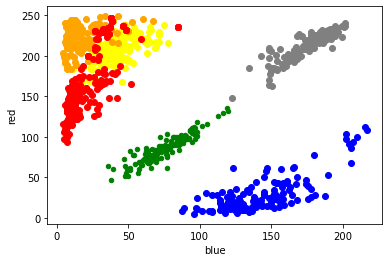

In [371]:
df = sframe_colors.to_dataframe()
plt = df[df.target == 'green'].plot.scatter(x='blue', y = 'red', c='Green')
plt.scatter(x = df[df.target == "yellow"]['blue'], y = df[df.target == "yellow"]['red'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['blue'], y = df[df.target == "white"]['red'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['blue'], y = df[df.target == "orange"]['red'], c='Orange')
plt.scatter(x = df[df.target == "red"]['blue'], y = df[df.target == "red"]['red'], c='Red')
plt.scatter(x = df[df.target == "blue"]['blue'], y = df[df.target == "blue"]['red'], c='Blue')

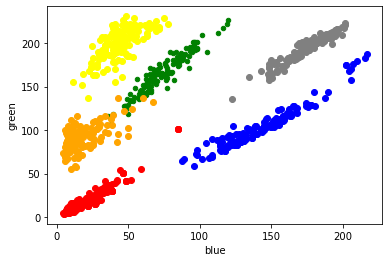

In [372]:
df = sframe_colors.to_dataframe()
plt = df[df.target == 'green'].plot.scatter(x='blue', y = 'green', c='Green')
plt.scatter(x = df[df.target == "yellow"]['blue'], y = df[df.target == "yellow"]['green'], c='Yellow')
plt.scatter(x = df[df.target == "white"]['blue'], y = df[df.target == "white"]['green'], c='Grey')
plt.scatter(x = df[df.target == "orange"]['blue'], y = df[df.target == "orange"]['green'], c='Orange')
plt.scatter(x = df[df.target == "red"]['blue'], y = df[df.target == "red"]['green'], c='Red')
plt.scatter(x = df[df.target == "blue"]['blue'], y = df[df.target == "blue"]['green'], c='Blue')

## Create a defualt model

In [373]:
data_train[['red', 'green', 'blue']]

red,green,blue
226.24744897959184,202.7944606413994,181.40962099125363
160.03279883381924,9.325801749271136,12.466107871720116
241.21137026239063,103.66180758017492,29.419460641399414
71.08491253644314,151.94460641399417,60.61807580174927
195.65524781341108,181.6865889212828,166.10204081632654
197.48943148688048,70.49781341107871,6.662900874635568
208.2084548104956,91.54227405247812,18.651967930029155
211.57179300291543,201.94314868804665,55.83090379008746
216.5932944606414,202.0386297376093,185.80685131195335
95.65196793002916,161.6898688046647,76.44788629737609


In [374]:
sframe_colors = tc.SFrame.read_csv('./capture-mathod-flash-on.csv')
sframe_colors.groupby('target',operations={'count': agg.COUNT()})

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.029625 secs.

Finished parsing file /Users/nicholaslarsen/Documents/7323 Projects/LearnedRubiks/Notebooks/capture-mathod-flash-on.csv

Parsing completed. Parsed 951 lines in 0.013937 secs.

target,count
green,138
orange,151
blue,144
yellow,149
red,223
blue\,1
white,145


In [387]:

data_train, data_test = sframe_colors.random_split(0.8)

#model = tc.classifier.create(data_train, target='target', verbose=False)

tc.nearest_neighbor_classifier.create(data_train, target='target',
                                          features=['red', 'green', 'blue'])

yhat = model.predict(data_test)
acc = sum(yhat == data_test['target'])/ float(len(data_test))
print('Acc:', acc)
model.export_coreml('./colors.mlmodel')

Starting ball tree nearest neighbors model training.

+------------+--------------+

| Tree level | Elapsed Time |

+------------+--------------+

| 0          | 234us        |

+------------+--------------+

Acc: 0.9375


In [376]:
data_test['yhat'] = yhat 

In [377]:
x = data_test['target' == 'red']

In [378]:
sf_filter = data_test[data_test.apply(lambda x: x['yhat'] != x['target'])] 

In [379]:
data_test[data_test['target'] != data_test['yhat']]

red,green,blue,target,yhat
16.206268221574344,87.5149416909621,115.74854227405248,blue\,blue
220.57636566332215,55.297658862876254,58.92586399108138,red,orange
99.92697881828316,179.07302118171685,209.81661092530655,blue,white
97.24860646599775,174.57413600891863,202.41192865105907,blue,white
227.20624303233,35.07357859531773,36.268115942028984,red,orange
246.2965440356745,30.711259754738016,38.20345596432553,red,orange
235.66610925306577,100.85507246376812,84.82385730211817,red,orange
231.44258639910817,41.28260869565217,48.517279821627646,red,orange
237.2051282051282,50.43701226309922,46.4314381270903,red,orange
246.2965440356745,30.711259754738016,38.20345596432553,red,orange


In [369]:
sf_filter

red,green,blue,target,yhat
227.20624303233,35.07357859531773,36.268115942028984,red,orange
235.59810479375696,31.8628762541806,37.19732441471571,red,orange
235.66610925306577,100.85507246376812,84.82385730211817,red,orange
235.66610925306577,100.85507246376812,84.82385730211817,red,orange
231.44258639910817,41.28260869565217,48.517279821627646,red,orange
